In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\co1012351486\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Lectura de los datos

In [3]:
data = pd.read_csv('Data.csv',sep = ';')

In [4]:
X = data.loc[:, data.columns != 'label']
y = data.label

### Entrenamiento del modelo de machine learning - Naive Bayes

0.8503370786516854


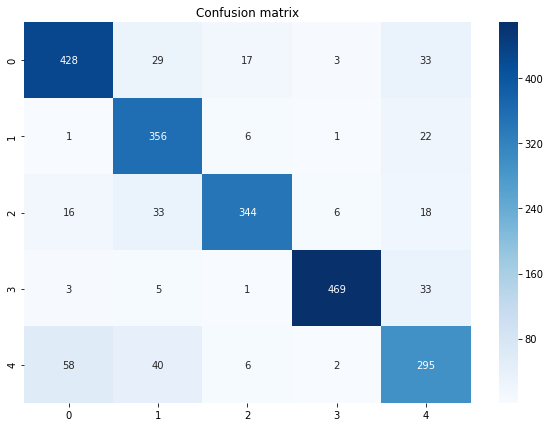

In [5]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = cross_val_predict(gnb, X, y, cv=10)
print(accuracy_score(y, y_pred))
conf_mat = confusion_matrix(y, y_pred)
plt.figure(figsize = (10,7))
plt.title('Confusion matrix')
sn.heatmap(conf_mat,annot=True,cmap='Blues', fmt='g')

In [6]:
print("Accuracy: ", round(accuracy_score(y,y_pred),3))
print("Recall: ", round(recall_score(y,y_pred,average='macro'),3))
print("Precision: ", round(precision_score(y,y_pred,average='macro'),3))
print("F1-score: ", round(f1_score(y,y_pred,average='macro'),3))

Accuracy:  0.85
Recall:  0.848
Precision:  0.849
F1-score:  0.846


### Entrenamiento del modelo de machine learning - MLP

0.9074157303370787


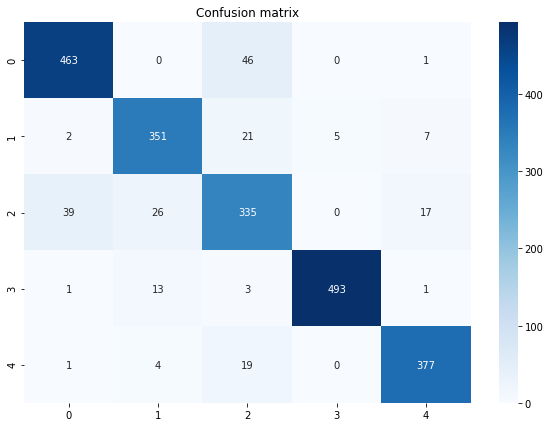

In [7]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(3, 3), random_state=1)
y_pred = cross_val_predict(nn, X, y, cv=10)
print(accuracy_score(y, y_pred))
conf_mat = confusion_matrix(y, y_pred)
plt.figure(figsize = (10,7))
plt.title('Confusion matrix')
sn.heatmap(conf_mat,annot=True,cmap='Blues', fmt='g')

In [8]:
print("Accuracy: ", round(accuracy_score(y,y_pred),3))
print("Recall: ", round(recall_score(y,y_pred,average='macro'),3))
print("Precision: ", round(precision_score(y,y_pred,average='macro'),3))
print("F1-score: ", round(f1_score(y,y_pred,average='macro'),3))

Accuracy:  0.907
Recall:  0.905
Precision:  0.904
F1-score:  0.905


In [9]:
import itertools
neurons = (1, 2, 3)
hidden_layer_size_2 = list(itertools.product(neurons, neurons))
hidden_layer_size_3 = list(itertools.product(neurons, neurons, neurons))
hidden_layer_sizes = list(neurons) + hidden_layer_size_2 + hidden_layer_size_3

In [10]:
from sklearn.grid_search import GridSearchCV

param_grid={
    'hidden_layer_sizes': hidden_layer_sizes,
    'activation': ['identity', 'logistic', 'tanh', 'relu']
}
grid = GridSearchCV(nn,param_grid)
grid.fit(X, y)

C:\Users\co1012351486\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [1, 2, 3, (1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 3, 1), (1, 3, 2), (1, 3, 3), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 3, 1), (2, 3, 2), (2, 3, 3), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 3, 1), (3, 3, 2), (3, 3, 3)], 'activation': ['identity', 'logistic', 'tanh'

In [11]:
print("Best Accuracy: ", round(grid.best_score_,2))
print("Number of hidden layers: ",grid.best_estimator_.hidden_layer_sizes)
print("Activation function: ",grid.best_estimator_.activation)
print("Best solver: ",grid.best_estimator_.solver)

Best Accuracy:  0.95
Number of hidden layers:  (3, 3)
Activation function:  identity
Best solver:  lbfgs


In [12]:
grid.best_estimator_
grid.best_params_

{'activation': 'identity', 'hidden_layer_sizes': (3, 3)}